# 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#시각화 글꼴 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (41.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

In [1]:
import matplotlib.pyplot as plt #실행 전 런타임 다시 시작

plt.rc('font', family='NanumBarunGothic')
# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

#plotly 시각화 라이브러리
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots #서브플롯 제작

pd.set_option('display.max_columns', None)
#warning 알림 무시
import warnings
warnings.filterwarnings('ignore')

##데이터 불러오기##

In [5]:
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"/content/drive/Othercomputers/내 노트북/Downloads/물류 유통량 예측 경진대회")

In [ ]:
#기본 데이터셋 세가지 불러오기
train_df=pd.read_csv("train.csv",encoding='utf-8')
test_df=pd.read_csv("test.csv",encoding='utf-8')
submission_df=pd.read_csv("sample_submission.csv",encoding='utf-8')
n_train = pd.read_csv("yw_train_df.csv")
n_test = pd.read_csv("yw_test_df.csv")

In [ ]:
#필요한 공공데이터셋 불러오기

#격자공간고유번호 50미터 데이터[국토연원] _ 2019년 12월 기준
#격자공간고유번호 50미터 데이터 17개 -> 우리나라 행정 시도청이 17개[서울특별시, 경기도, 충청남도, 충청북도, 대전광역시 등]
#격자공간고유번호 -> 앞자리 2글자, 5글자, 나머지는 한 단위로 쪼개거나 패턴 파악 후 결정하는 걸로
space11 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_11.csv",encoding='utf-8')
space26 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_26.csv",encoding='utf-8')
space27 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_27.csv",encoding='utf-8')
space28 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_28.csv",encoding='utf-8')
space29 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_29.csv",encoding='utf-8')
space30 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_30.csv",encoding='utf-8')
space31 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_31.csv",encoding='utf-8')
space36 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_36.csv",encoding='utf-8')
space41 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_41.csv",encoding='utf-8')
space42 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_42.csv",encoding='utf-8')
space43 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_43.csv",encoding='utf-8')
space44 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_44.csv",encoding='utf-8')
space45 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_45.csv",encoding='utf-8')
space46 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_46.csv",encoding='utf-8')
space47 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_47.csv",encoding='utf-8')
space48 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_48.csv",encoding='utf-8')
space50 = pd.read_csv("1b8b1491-994f-4ca2-bb05-714057d2d7c2/TC_NU_SPG_50_METER_50.csv",encoding='utf-8')

In [ ]:
test_df

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식
...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물
7916,7916,1154500001098300,5011000264055100,문화컨텐츠
7917,7917,5013000610049100,1147000018091400,농산물
7918,7918,5013000610049100,3117000039026100,농산물


In [ ]:
#물품 카테고리 데이터
#기존의 데이터에서 분석에 용이하게 하기 위해 excel로 수정 작업 진행
category_data = pd.read_csv("블록단위 월별 착지 데이터(수정).csv",encoding="cp949")

In [ ]:
market_data = pd.read_csv("한국농수산식품유통공사_농수산물 산지공판장 현황_12_31_2019.csv", encoding='cp949')

In [ ]:
space11

,격자공간고유번호,격자공간명,시군구코드,시군구명
0,1150000001001100,다사3855,11500,강서구
1,1150000001001200,다사3855,11500,강서구
2,1150000001001300,다사3855,11500,강서구
3,1150000001001400,다사3855,11500,강서구
4,1150000001002100,다사3855,11500,강서구
...,...,...,...,...
241995,1174000025099400,다사6846,11740,강동구
241996,1174000025100100,다사6846,11740,강동구
241997,1174000025100200,다사6846,11740,강동구
241998,1174000025100300,다사6846,11740,강동구


In [ ]:
test_df.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,물품대분류_코드,물품중분류_코드,물품종합코드,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 0~10,송하인_격자공간고유번호 11~13,송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 0~10,수하인_격자공간고유번호 11~13,수하인_격자공간고유번호 14
0,0,4167000577042200,5011000435014100,선케어,11,8,1108,41,41670,4167000577,042,2,50,50110,5011000435,014,1
1,1,1156000009012200,5011000172034400,구강위생용품,5,3,503,11,11560,1156000009,012,2,50,50110,5011000172,034,4
2,2,4122000363057300,5011000361097300,캠핑,6,15,615,41,41220,4122000363,057,3,50,50110,5011000361,097,3
3,3,5011000436041400,2826000084036400,아웃도어가구,1,7,107,50,50110,5011000436,041,4,28,28260,2826000084,036,4
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,8,3,803,41,41500,4150000241,065,2,50,50110,5011000169,044,3


In [ ]:
market_data.head()

,부류,소재지,공판장 명칭,주소,Unnamed: 4
0,청과,충남,공주농협,공주시,NaN
1,청과,전남,목포원예농협,목포시,NaN
2,청과,전남,여수원예농협,여수시,NaN
3,청과,전북,군산원예농협,군산시,NaN
4,임산,강원,강릉산림조합,강릉시,NaN


# 전처리


*   격자고유공간코드 string 나누기
* 상위 카테고리 변수 생성
*   파생변수 생성
* 타 데이터 찾아보기



In [ ]:
#격자고유공간코드 분리하는 함수 생성
#앞 두글자: 시도
def spaceid_sep(data, column):
  l = [(0, 2), (0, 5), (5, 8), (8, 10), (10, 13), (13, 14)]  #분리할 str 기준 리스트 생성
  name_list = [f'{column} 시도', f'{column}시군구', f'{column} 5~8', f'{column} 8~10', f'{column} 10~13' f'{column} 14'] #열 이름 리스트 생성

  data[column] = data[column].astype(str) #열 자료형 string으로 변환

  X = [[data[column][i][start:end] for i in range(len(data))] for start, end in l] #각 구분 마다 리스트로

  for name, x in zip(name_list, X): #각 구분마다 column 생성 후 그에 맞는 값 넣어주기 zip()
      data[name] = x

  return data


In [ ]:
for data in [train_df, test_df]:
  for col in ['송하인_격자공간고유번호','수하인_격자공간고유번호']:
    spaceid_sep(data,col)

In [ ]:
#상위 카테고리 열 생성하는 함수 생성
#서울시 CJ대한통운 택배 유형별 월 데이터 활용
#각 열에 대분류, 중분류 별 송장건수를 집계한 데이터
#여러 유통 카테고리를 찾아보고자 했지만 우리 데이터에 적합한 카테고리를 찾는 것이 힘들었음[대한상공회의소, 유통 관련 논문도 참고하고자 함]
#그러던 중 코드공유 중 "전국 상품 물동량 점유율" 데이터를 활용했다는 것을 알게 됨
#하지만 이제 접근할 수 없는 데이터 였고, CJ 대한통운에서 제공하는 데이터라는 정보만 알게 됨
#이를 바탕으로 카테고리를 찾고자 함 -> 서울시 택배 유형별 월 데이터

def upper_cat(data1, catdata):
  #만들고자 하는 열 생성 & 초기화
  data1['물품대분류_코드'] = 0
  data1['물품중분류_코드'] = 0
  data1['물품종합코드'] = 0

  for index, row in data1.iterrows(): #데이터의 행의 인덱스, 행
      category = row['물품_카테고리'] #원본 데이터의 모든 행의 카테고리를 저장하는 카테고리 변수 생성
      matching_rows = catdata[catdata['상품중분류'] == category] #카테고리 코드번호가 있는 데이터에서 앞서 만든 카테고리변수의 상품분류가 들어있는 행 저장
      if not matching_rows.empty: #루프 중 비어있지 않은 행이 있으면 코드들 지정
          data1.loc[index, '물품대분류_코드'] = matching_rows.iloc[0]['대분류코드']
          data1.loc[index, '물품중분류_코드'] = matching_rows.iloc[0]['중분류코드']
          data1.loc[index, '물품종합코드'] = matching_rows.iloc[0]['총코드']

  return data1

In [ ]:
upper_cat(train_df, category_data)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 5~8,송하인_격자공간고유번호 8~10,송하인_격자공간고유번호 10~13송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 5~8,수하인_격자공간고유번호 8~10,수하인_격자공간고유번호 10~13수하인_격자공간고유번호 14,물품대분류_코드,물품중분류_코드,물품종합코드
0,0,5011000595017300,2871000192069300,음반,3,50,50110,005,95,017,28,28710,001,92,069,0,0,0
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41,41480,006,90,043,50,50110,002,64,024,0,0,0
2,2,5011000078068400,1120000007005400,농산물,3,50,50110,000,78,068,11,11200,000,07,005,7,5,705
3,3,4127100048006400,5011000587019400,기타식품,7,41,41271,000,48,006,50,50110,005,87,019,7,3,703
4,4,5011000078068400,2823700010076300,농산물,3,50,50110,000,78,068,28,28237,000,10,076,7,5,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44,44710,002,90,087,50,50110,002,13,073,6,11,611
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11,11290,000,14,045,50,50110,003,19,087,4,12,412
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11,11290,000,14,045,50,50110,002,63,065,4,12,412
31682,31682,4127300065073100,5011000264061200,지갑,7,41,41273,000,65,073,50,50110,002,64,061,10,14,1014


In [ ]:
upper_cat(test_df, category_data)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 5~8,송하인_격자공간고유번호 8~10,송하인_격자공간고유번호 10~13송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 5~8,수하인_격자공간고유번호 8~10,수하인_격자공간고유번호 10~13수하인_격자공간고유번호 14,물품대분류_코드,물품중분류_코드,물품종합코드
0,0,4167000577042200,5011000435014100,선케어,41,41670,005,77,042,50,50110,004,35,014,11,8,1108
1,1,1156000009012200,5011000172034400,구강위생용품,11,11560,000,09,012,50,50110,001,72,034,5,3,503
2,2,4122000363057300,5011000361097300,캠핑,41,41220,003,63,057,50,50110,003,61,097,6,15,615
3,3,5011000436041400,2826000084036400,아웃도어가구,50,50110,004,36,041,28,28260,000,84,036,1,7,107
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41,41500,002,41,065,50,50110,001,69,044,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물,50,50110,002,66,051,46,46230,004,17,038,7,5,705
7916,7916,1154500001098300,5011000264055100,문화컨텐츠,11,11545,000,01,098,50,50110,002,64,055,0,0,0
7917,7917,5013000610049100,1147000018091400,농산물,50,50130,006,10,049,11,11470,000,18,091,7,5,705
7918,7918,5013000610049100,3117000039026100,농산물,50,50130,006,10,049,31,31170,000,39,026,7,5,705


In [ ]:
#분류되지 않은 카테고리 확인
train_uniques = train_df['물품_카테고리'].unique()
category_data_uniques = category_data['상품중분류'].unique()

filtered_values = [i for i in train_uniques if i not in category_data_uniques]
print(filtered_values)

['음반', '문화컨텐츠', '기저귀/물티슈', '출산/유아동의류', '과자', '다이어트식품', '냉동/간편조리식품', '선글라스/안경테', '침구세트', '침구단품', 'PC', '커튼/블라인드', '재활운동용품', '분유/이유식/아기간식', '카페트/러그', '유아가구']


In [ ]:
#test도 확인해주기
test_uniques = test_df['물품_카테고리'].unique()

filtered_test_values = [i for i in test_uniques if i not in category_data_uniques]
print(filtered_test_values)

['분유/이유식/아기간식', '커튼/블라인드', '침구단품', '카페트/러그', '기저귀/물티슈', '재활운동용품', '음반', 'PC', '냉동/간편조리식품', '문화컨텐츠', '과자', '다이어트식품', '침구세트', '출산/유아동의류', '선글라스/안경테', '유아가구']


In [ ]:
#train, test 모두 동일한 품목이 속해있지 않음
#가장 유사한 중분류로 넣어주기
cat_list = ['음반', '문화컨텐츠', '기저귀/물티슈', '출산/유아동의류', '과자', '다이어트식품', '냉동/간편조리식품',
            '선글라스/안경테', '침구세트', '침구단품', 'PC', '커튼/블라인드', '재활운동용품', '분유/이유식/아기간식', '카페트/러그', '유아가구']
#각각 [도서/음반, 도서/음반, 기저귀, 출산/유아동잡화, 기타식품, 기타식품, 가공식품,
# 선글라스/안경, 침실제품, 침실제품, PC/노트북/테블릿, 기타가구/인테리어, 기타스포츠, 분유/이유식, 기타가구/인테리어, 기타출산/육아] 이렇게 할당
num_list = [[3,1,301],[3,1,301],[8,1,801],[8,8,808],[7,0,703],[7,3,703],[7,1,701],[10,5,1005],
            [1,11,111],[1,11,111],[4,1,401],[1,4,104],[6,2,602], [8,3,803],[1,4,104],[8,2,802] ]
#각 품목마다 대분류, 중분류, 총 코드 리스트 생성

#반복문 zip() 활용해서 각 리스트의 순서에 맞게 packing
for data in [train_df,test_df]:
  for cat, num in zip(cat_list, num_list):
    data.loc[data['물품_카테고리']==cat, ['물품대분류_코드',	'물품중분류_코드',	'물품종합코드']] = num

In [ ]:
train_df.loc[train_df['물품종합코드']==0]
#0으로 처리되어 있는 행 확인
#각 코드가 있다보니 인코딩은 해줄 필요 없을 듯
#catboost 쓰면 좋을 것 같음 -> category 지정 가능

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 5~8,송하인_격자공간고유번호 8~10,송하인_격자공간고유번호 10~13송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 5~8,수하인_격자공간고유번호 8~10,수하인_격자공간고유번호 10~13수하인_격자공간고유번호 14,물품대분류_코드,물품중분류_코드,물품종합코드


In [ ]:
#수하인 시군수에 따라서 공판장 개수 넣어주는 형식
#수하인 시군구 명 열 생성 ex)강서구 -> 시군구 코드 사용
#market_data에서 청과인 행만 추출, 필요없는 열 제거
market_data = market_data.loc[market_data['부류']=="청과"]
market_data.drop("Unnamed: 4",axis=1, inplace=True)

#지역별 농산물공판장 수 딕셔너리 생성
market_count = dict(market_data['주소'].value_counts())

In [ ]:
#격자공간 데이터 리스트 생성
space_datas = [space11, space26, space27, space28, space29, space30, space31, space36, space41, space42, space43, space44, space45, space46, space47, space48, space50]

In [ ]:
#시군구명 열 추가
for d in [train_df,test_df]:
  for data in space_datas:
    name = data['시군구명'].unique()
    code = data['시군구코드'].unique()
    dictionary = {c : n for n,c in zip(name,code)} #시군구코드별 시군구명 딕셔너리 생성

    for key, value in dictionary.items():
      for index, row in d.iterrows():
          code_value1 = row['수하인_격자공간고유번호시군구']
          code_value2 = row['송하인_격자공간고유번호시군구']
          if str(code_value1) in str(key):
            name_value = value  # 딕셔너리에서 값 가져오기
            d.loc[index, '수하인_격자공간고유번호시군구명'] = name_value
          if str(code_value2) in str(key):
            name_value = value  # 딕셔너리에서 값 가져오기
            d.loc[index, '송하인_격자공간고유번호시군구명'] = name_value


  d['수하인_농산물공판장수'] = 0
  d['송하인_농산물공판장수'] = 0
  for key, value in market_count.items():
    for index, row in d.iterrows():
      code_value1 = row['송하인_격자공간고유번호시군구명']
      code_value2 = row['수하인_격자공간고유번호시군구명']
      if str(code_value1) in str(key):
        num_val = value
        d.loc[index,'송하인_농산물공판장수'] = num_val
      if str(code_value2) in str(key):
        num_val = value
        d.loc[index,'수하인_농산물공판장수'] = num_val

In [ ]:
train_df.head(10)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 5~8,송하인_격자공간고유번호 8~10,송하인_격자공간고유번호 10~13송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 5~8,수하인_격자공간고유번호 8~10,수하인_격자공간고유번호 10~13수하인_격자공간고유번호 14,물품대분류_코드,물품중분류_코드,물품종합코드,수하인_격자공간고유번호시군구명,송하인_격자공간고유번호시군구명,수하인_농산물공판장수,송하인_농산물공판장수
0,0,5011000595017300,2871000192069300,음반,3,50,50110,005,95,017,28,28710,001,92,069,3,1,301,강화군,제주시,0,1
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41,41480,006,90,043,50,50110,002,64,024,3,1,301,제주시,파주시,1,0
2,2,5011000078068400,1120000007005400,농산물,3,50,50110,000,78,068,11,11200,000,07,005,7,5,705,성동구,제주시,0,1
3,3,4127100048006400,5011000587019400,기타식품,7,41,41271,000,48,006,50,50110,005,87,019,7,3,703,제주시,안산시상록구,1,0
4,4,5011000078068400,2823700010076300,농산물,3,50,50110,000,78,068,28,28237,000,10,076,7,5,705,부평구,제주시,0,1
5,5,5013000778073200,4159000114016400,농산물,6,50,50130,007,78,073,41,41590,001,14,016,7,5,705,화성시,서귀포시,0,0
6,6,5011000316024300,4827000369060200,수산,5,50,50110,003,16,024,48,48270,003,69,060,7,7,707,밀양시,제주시,1,1
7,7,5013000740006400,4111700017039400,농산물,3,50,50130,007,40,006,41,41117,000,17,039,7,5,705,수원시 영통구,서귀포시,0,0
8,8,4136000209094100,5013000823053400,아우터,3,41,41360,002,09,094,50,50130,008,23,053,9,6,906,서귀포시,남양주시,0,0
9,9,5011000315056100,4127100026035200,농산물,8,50,50110,003,15,056,41,41271,000,26,035,7,5,705,안산시상록구,제주시,0,1


In [ ]:
test_df[test_df['수하인_격자공간고유번호시군구명']=="영천시"]

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_격자공간고유번호 시도,송하인_격자공간고유번호시군구,송하인_격자공간고유번호 5~8,송하인_격자공간고유번호 8~10,송하인_격자공간고유번호 10~13송하인_격자공간고유번호 14,수하인_격자공간고유번호 시도,수하인_격자공간고유번호시군구,수하인_격자공간고유번호 5~8,수하인_격자공간고유번호 8~10,수하인_격자공간고유번호 10~13수하인_격자공간고유번호 14,물품대분류_코드,물품중분류_코드,물품종합코드,수하인_격자공간고유번호시군구명,농산물공판장 수
579,579,5011001116066400,4723000610033100,농산물,50,50110,011,16,066,47,47230,006,10,033,7,5,705,영천시,2
2148,2148,5011000137030100,4723000554067400,농산물,50,50110,001,37,030,47,47230,005,54,067,7,5,705,영천시,2
2897,2897,5011000424078200,4723000780063100,농산물,50,50110,004,24,078,47,47230,007,80,063,7,5,705,영천시,2
3029,3029,5013000902080400,4723000227031300,기타식품,50,50130,009,02,080,47,47230,002,27,031,7,3,703,영천시,2
3288,3288,5011000367041300,4723000752053100,농산물,50,50110,003,67,041,47,47230,007,52,053,7,5,705,영천시,2
5203,5203,5013000731055200,4723000572046100,농산물,50,50130,007,31,055,47,47230,005,72,046,7,5,705,영천시,2
6498,6498,5011000078068400,4723000311037200,농산물,50,50110,000,78,068,47,47230,003,11,037,7,5,705,영천시,2
6679,6679,5013000622057100,4723000638071300,농산물,50,50130,006,22,057,47,47230,006,38,071,7,5,705,영천시,2


In [ ]:
train_df.to_csv('yw_train_df.csv', index=False)
test_df.to_csv('yw_test_df.csv', index=False)

# EDA
* 전처리 후 추가 파생변수 생성을 위한 가설에 도움이 될만한 인사이트 발굴

In [ ]:
#시도별 딕셔너리 생성
city_dic = {"11":"서울시", "26":"부산시", "27":"대구시", "28":"인천시",
            "29":"광주시", "30":"대전시", "31":"울산시","36":"세종시",
            "41":"경기도","42":"강원도", "43":"충북도", "44":"충남도",
            "45":"전북도", "46":"전남도", "47":"경북도", "48":"경남도", '50':"제주도"}
label = city_dic.values()
num = city_dic.keys()

Text(0.5, 1.0, '시도별 송하인 건수')

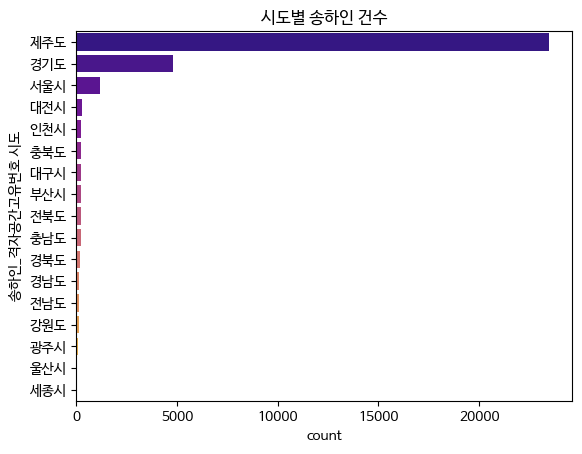

In [ ]:
#시도별 송하인 수 확인
count_df = train_df['송하인_격자공간고유번호 시도'].map(city_dic).value_counts().sort_values(ascending=False)

sns.countplot(train_df['송하인_격자공간고유번호 시도'].map(city_dic), order=count_df.index,
              palette="plasma")
plt.title("시도별 송하인 건수")

Text(0.5, 1.0, '시도별 수하인 건수')

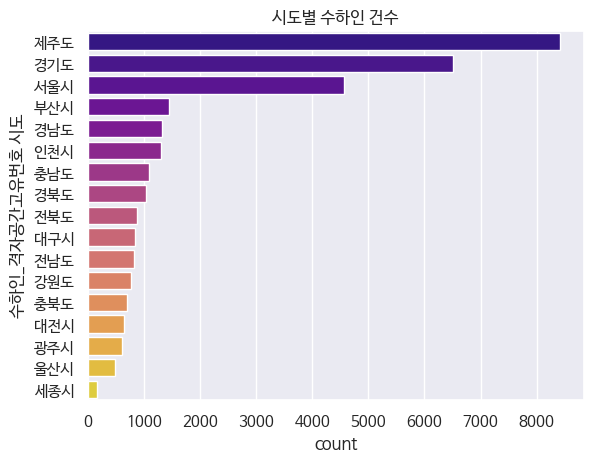

In [ ]:
#시도별 송하인 건수 확인
count_df = train_df['수하인_격자공간고유번호 시도'].map(city_dic).value_counts().sort_values(ascending=False)

sns.countplot(train_df['수하인_격자공간고유번호 시도'].map(city_dic), order=count_df.index,
              palette="plasma")
plt.title("시도별 수하인 건수")

In [ ]:
sns.set(color_codes=True)

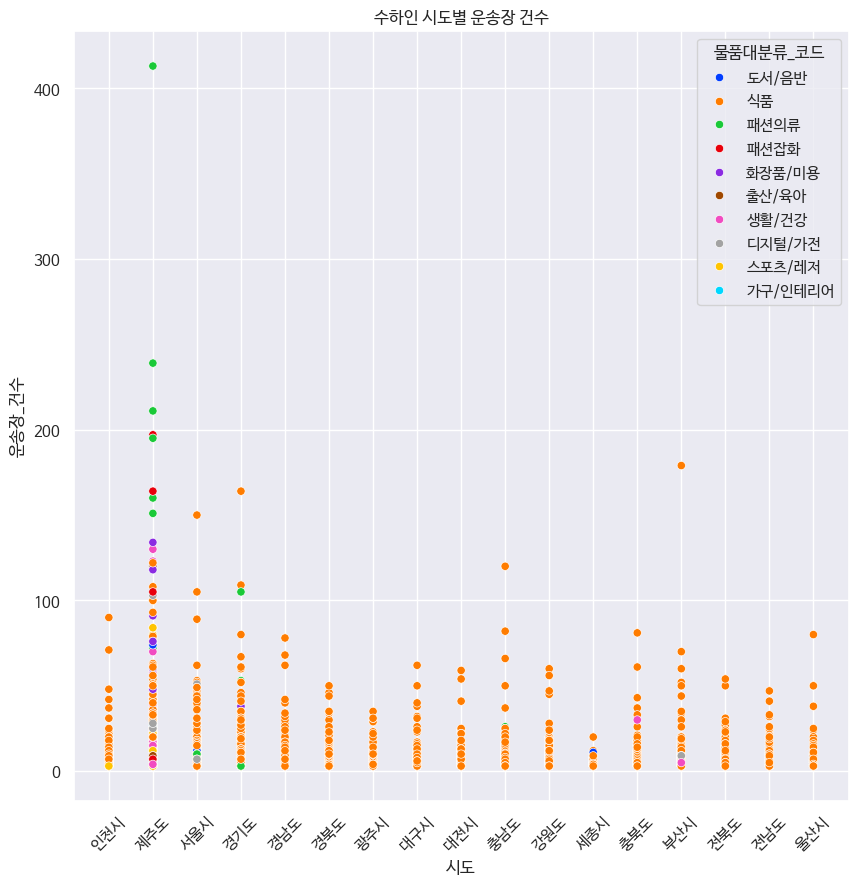

In [ ]:
label_order = sorted(city_dic, key=lambda x: int(x))
cate_dic = {1:"가구/인테리어", 2:"기타", 3:"도서/음반",4:"디지털/가전",5:"생활/건강",
            6:"스포츠/레저",7:"식품",8:"출산/육아",9:"패션의류",10:"패션잡화",11:"화장품/미용"}

sns.set_palette("bright")
plt.figure(figsize=(10,10))

sns.scatterplot(x=train_df['수하인_격자공간고유번호 시도'].map(city_dic), y='운송장_건수',
                hue=train_df["물품대분류_코드"].map(cate_dic), data=train_df)

plt.xticks(rotation=45)
plt.xlabel('시도')
plt.title("수하인 시도별 운송장 건수")

plt.show()

<Axes: ylabel='농산물공판장 수'>

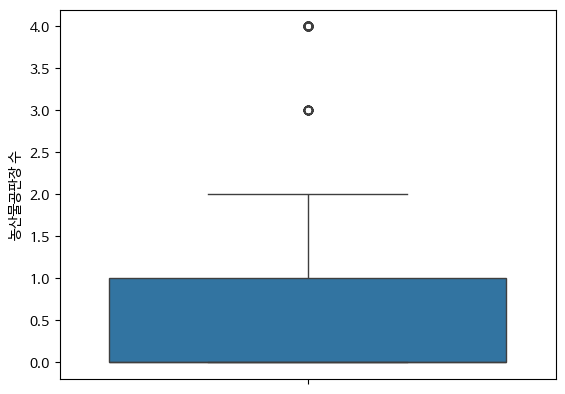

In [ ]:
sns.boxplot(n_train['농산물공판장 수'])

# 파생변수 추가 후 전처리: 스케일링


In [83]:
train = pd.read_csv("final_train.csv")
test = pd.read_csv("final_test.csv")

In [84]:
#필요없는 변수 삭제

drop_col = ['index', '물품_카테고리', '송하인_시군구별','송하인_시도별','수하인_시군구별', '수하인_시도별']
for d in [train, test]:
  d.drop(drop_col, axis=1, inplace=True)

In [85]:
#문자형으로 되어있던 변수들 형변환

for d in [train, test]:
  d['수하인 1인당 지역총소득'] = d['수하인 1인당 지역총소득'].str.replace(',', '')
  d['수하인 1인당 지역총소득'] = d['수하인 1인당 지역총소득'].astype('int64')
  d['송하인 1인당 지역총소득'] = d['송하인 1인당 지역총소득'].str.replace(',', '')
  d['송하인 1인당 지역총소득'] = d['송하인 1인당 지역총소득'].astype('int64')
  d['수하인_인구밀도'] = d['수하인_인구밀도'].str.replace(',','')
  d['수하인_인구밀도'] = d['수하인_인구밀도'].astype('int64')

In [8]:
col = ['송하인_1인가구',	'송하인_다가구',	'수하인_1인가구',	'수하인_다가구',	'송하인_1인가구(시군구)',	'송하인_다가구(시군구)',
       '수하인_1인가구(시군구)',	'수하인_다가구(시군구)',	'송하인_총유통시설수(시도)',	'수하인_총유통시설수(시도)',	'송하인_총유통시설수(시군구)',
       	'수하인_총유통시설수(시군구)',	'수하인 도매업수',	'송하인 도매업수',	'수하인 1인당 지역총소득',	'송하인 1인당 지역총소득',	'수하인_농산물공판장수',	'송하인_농산물공판장수',	'수하인_인구밀도']

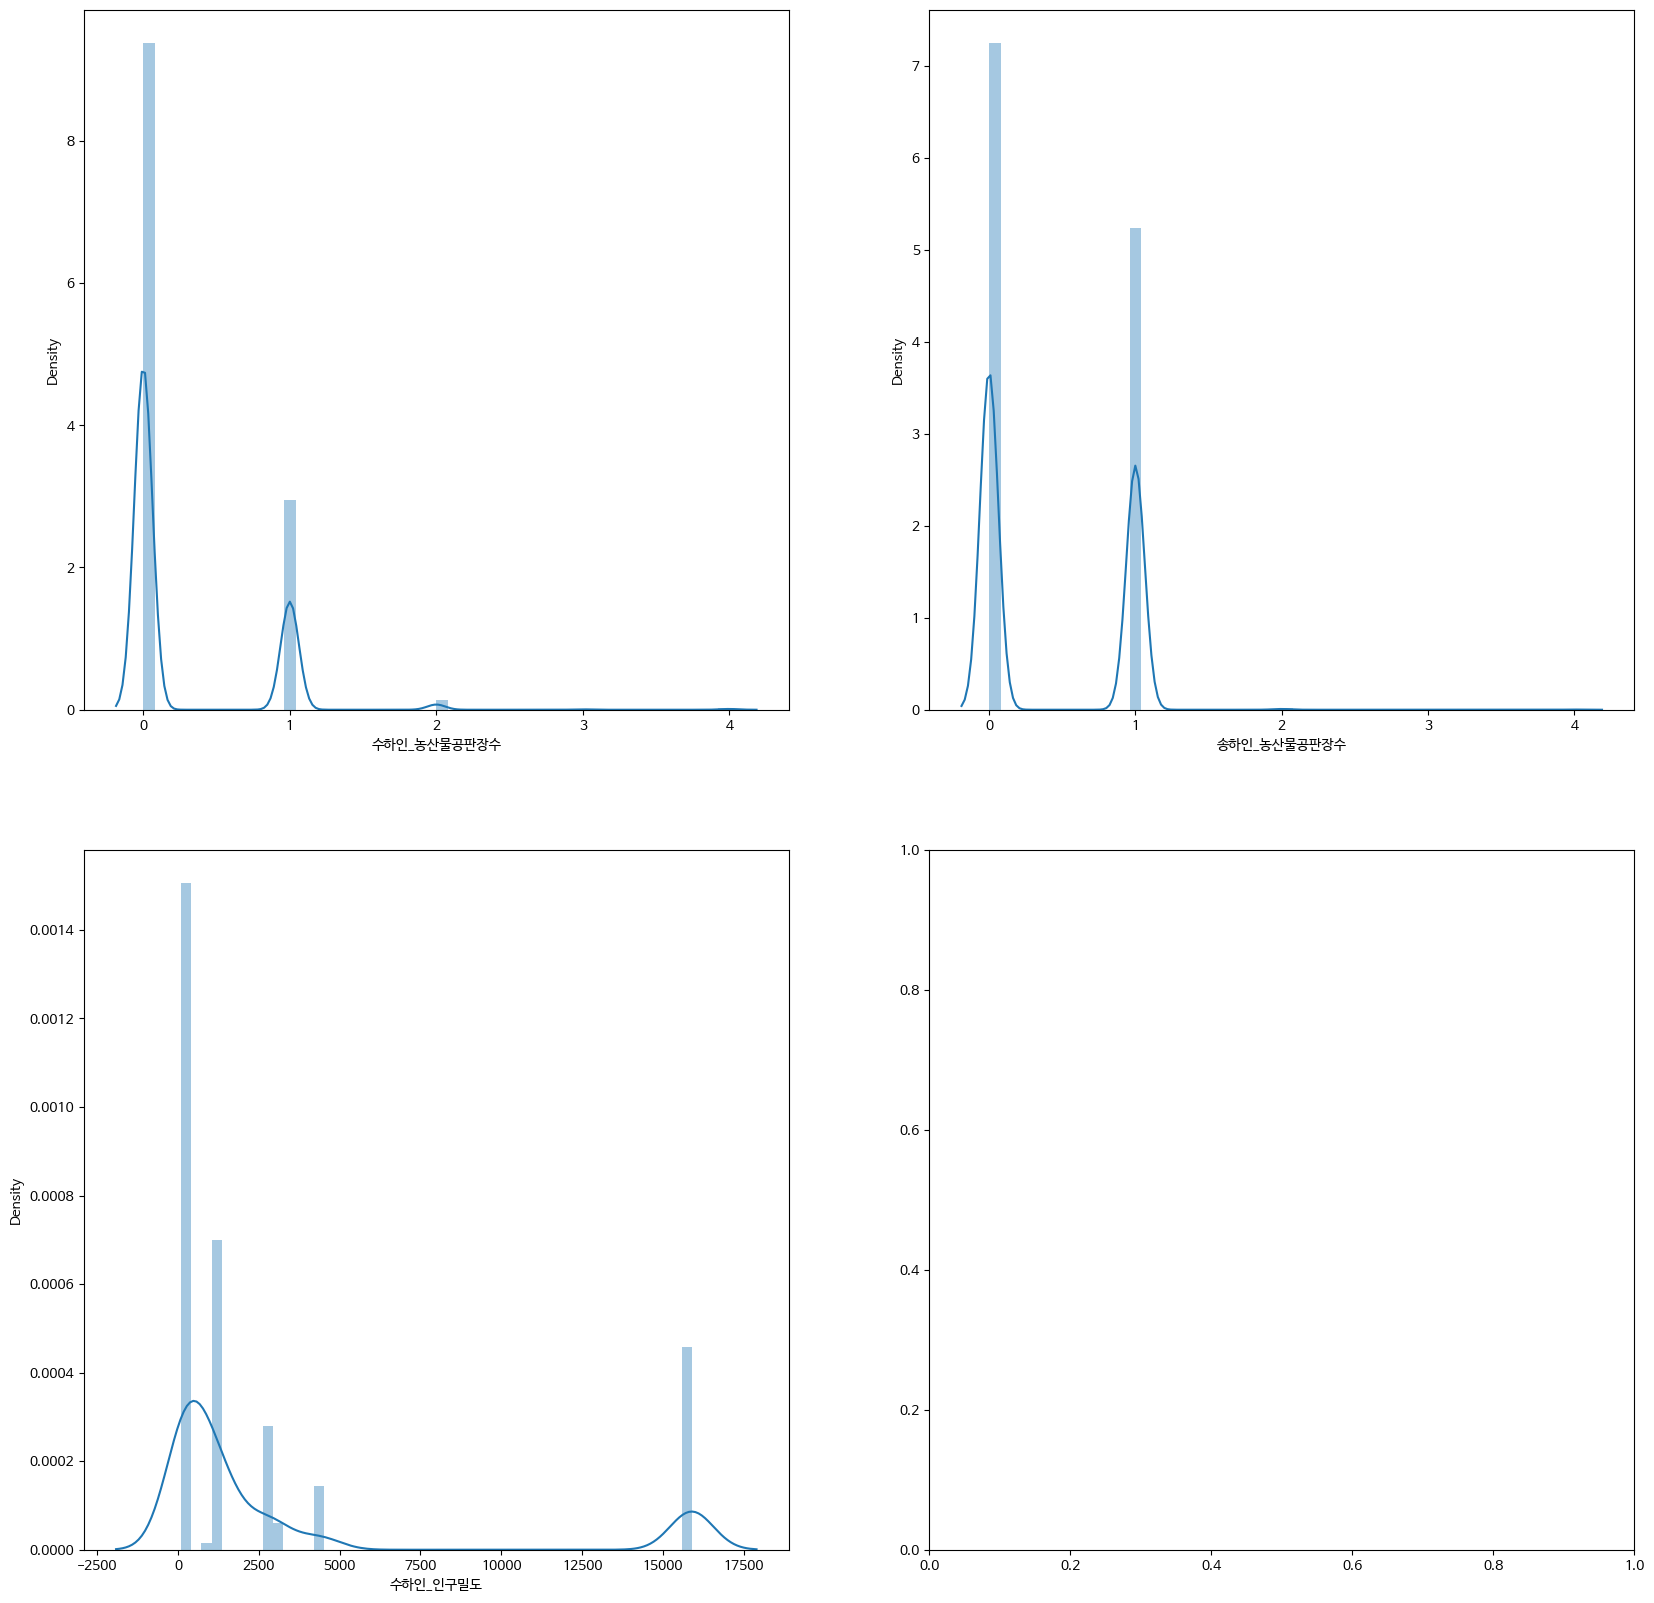

In [64]:
col = [['송하인_1인가구',	'송하인_다가구',	'수하인_1인가구',	'수하인_다가구'],
        ['송하인_1인가구(시군구)',	'송하인_다가구(시군구)', '수하인_1인가구(시군구)',	'수하인_다가구(시군구)'],
        ['송하인_총유통시설수(시도)','수하인_총유통시설수(시도)',	'송하인_총유통시설수(시군구)','수하인_총유통시설수(시군구)'],
        ['수하인 도매업수',	'송하인 도매업수','수하인 1인당 지역총소득',	'송하인 1인당 지역총소득'],
        ['수하인_농산물공판장수',	'송하인_농산물공판장수',	'수하인_인구밀도']]
for m in col:
  fig = plt.figure(figsize=(20,20))
  ax1 = fig.add_subplot(2,2,1)
  ax2 = fig.add_subplot(2,2,2)
  ax3 = fig.add_subplot(2,2,3)
  ax4 = fig.add_subplot(2,2,4)
  axs = [ax1, ax2, ax3, ax4]
  for i, a in zip(m, axs):
    sns.distplot(train[i], ax=a)

In [65]:
#feature scaling
#총유통시설수(시군구)의 경우에는 skew가 커 log변환 진행
#분포를 봤을 때, 시도별, 시군구별로 각 값을 대입하여 여러 쌍의 언덕이 나타남

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard = StandardScaler()
minmax = MinMaxScaler()

for d in [train, test]:
  d['송하인_총유통시설수(시군구)']  = np.log1p(d['송하인_총유통시설수(시군구)'])
  d['수하인_총유통시설수(시군구)']  = np.log1p(d['수하인_총유통시설수(시군구)'])


selected_columns = ['송하인_1인가구',	'송하인_다가구',	'수하인_1인가구',	'수하인_다가구',
                    '송하인_1인가구(시군구)',	'송하인_다가구(시군구)',
                    '수하인_1인가구(시군구)',	'수하인_다가구(시군구)',	'송하인_총유통시설수(시도)',
                    '수하인_총유통시설수(시도)', '수하인 도매업수',	'송하인 도매업수',
                    '수하인 1인당 지역총소득',	'송하인 1인당 지역총소득',	'수하인_인구밀도','수하인_농산물공판장수','송하인_농산물공판장수']

minmax = MinMaxScaler()

# MinMaxScaler를 사용하여 train 데이터와 test 데이터 스케일링
minmax.fit(train[selected_columns])
train[selected_columns] = minmax.transform(train[selected_columns])
test[selected_columns] = minmax.transform(test[selected_columns])

In [86]:
selected_columns = ['송하인_1인가구',	'송하인_다가구',	'수하인_1인가구',	'수하인_다가구',
                    '송하인_1인가구(시군구)',	'송하인_다가구(시군구)',
                    '수하인_1인가구(시군구)',	'수하인_다가구(시군구)',	'송하인_총유통시설수(시도)',
                    '수하인_총유통시설수(시도)', '수하인 도매업수',	'송하인 도매업수',
                    '수하인 1인당 지역총소득',	'송하인 1인당 지역총소득',	'수하인_인구밀도','수하인_농산물공판장수','송하인_농산물공판장수']

minmax = MinMaxScaler()

# MinMaxScaler를 사용하여 train 데이터와 test 데이터 스케일링
train[selected_columns] = minmax.fit_transform(train[selected_columns])
test[selected_columns] = minmax.transform(test[selected_columns])

In [80]:
test = minmax.transform(test[selected_columns])

In [87]:
test.head()

,송하인_격자공간고유번호,수하인_격자공간고유번호,송하인_시도,송하인_시군구,송하인_기타1,송하인_기타2,송하인_기타3,송하인_기타4,수하인_시도,수하인_시군구,수하인_기타1,수하인_기타2,수하인_기타3,수하인_기타4,송하인_1인가구,송하인_다가구,수하인_1인가구,수하인_다가구,송하인_1인가구(시군구),송하인_다가구(시군구),수하인_1인가구(시군구),수하인_다가구(시군구),송하인_총유통시설수(시도),수하인_총유통시설수(시도),송하인_총유통시설수(시군구),수하인_총유통시설수(시군구),물품대분류_코드,물품중분류_코드,물품종합코드,수하인_농산물공판장수,송하인_농산물공판장수,수하인 도매업수,송하인 도매업수,수하인 1인당 지역총소득,송하인 1인당 지역총소득,수하인_인구밀도
0,4167000577042200,5011000435014100,41,41670,5,77,42,200,50,50110,4,35,14,100,0.992945,1.0,0.028773,0.025963,0.073625,0.081404,0.385330,0.403469,0.54699,0.074897,730.0,3534.0,11,8,1108,0.25,0.0,0.054696,0.963864,0.080696,0.419073,0.017151
1,4122000363057300,5011000361097300,41,41220,3,63,57,300,50,50110,3,61,97,300,0.992945,1.0,0.028773,0.025963,0.436774,0.418110,0.385330,0.403469,0.54699,0.074897,1260.0,3534.0,6,15,615,0.25,0.0,0.054696,0.963864,0.080696,0.419073,0.017151
2,4150000241065200,5011000169044300,41,41500,2,41,65,200,50,50110,1,69,44,300,0.992945,1.0,0.028773,0.025963,0.145670,0.169443,0.385330,0.403469,0.54699,0.074897,2070.0,3534.0,8,3,803,0.25,0.0,0.054696,0.963864,0.080696,0.419073,0.017151
3,4141000031030100,5013000033057300,41,41410,0,31,30,100,50,50130,0,33,57,300,0.992945,1.0,0.028773,0.025963,0.157842,0.228380,0.145504,0.143021,0.54699,0.074897,1912.0,1364.0,10,1,1001,0.00,0.0,0.054696,0.963864,0.080696,0.419073,0.017151
4,4157000306018300,5011000323038200,41,41570,3,6,18,300,50,50110,3,23,38,200,0.992945,1.0,0.028773,0.025963,0.242527,0.368084,0.385330,0.403469,0.54699,0.074897,356.0,3534.0,11,4,1104,0.25,0.0,0.054696,0.963864,0.080696,0.419073,0.017151


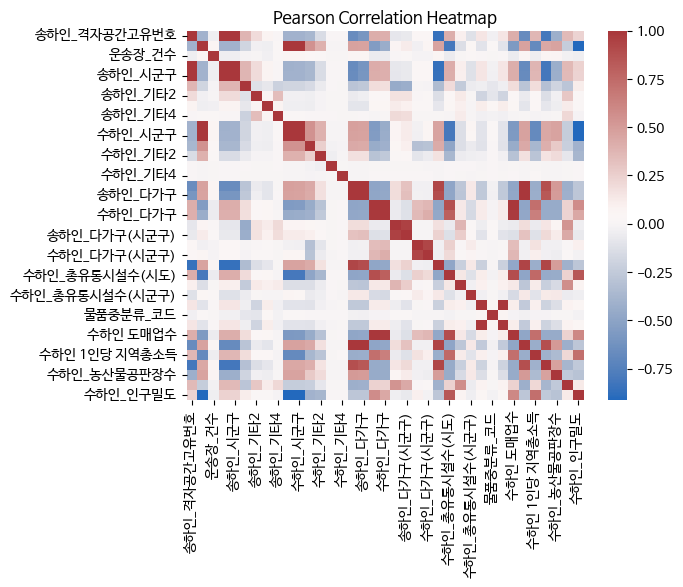

In [92]:
train.corr()
corr_matrix = train.corr(method='pearson')
sns.heatmap(
    corr_matrix, annot=False, cmap='vlag'
)
plt.title("Pearson Correlation Heatmap")
plt.show()